In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import utils, model_selection

In [89]:
def load_data(partition="train"):
    dataset = np.load(f"./datasets/dogcat_{partition}.npz")
    x, y  = dataset["images"], dataset["labels"]
    x, y = utils.shuffle(x, y)
    # transform strings to integers
    y = np.array([1 if yy == "dog" else 0 for yy in y])
    # 0 to [1,0] and 1 to [0,1]
    y = np.eye(2)[y]
    return x,y

train_x, train_y = load_data("train")

In [90]:
# keep part of the data 
train_x, val_x, train_y, val_y = model_selection.train_test_split(train_x, train_y, test_size=0.2)

In [91]:
input_shape = train_x[0].shape
input_shape

(256, 256, 3)

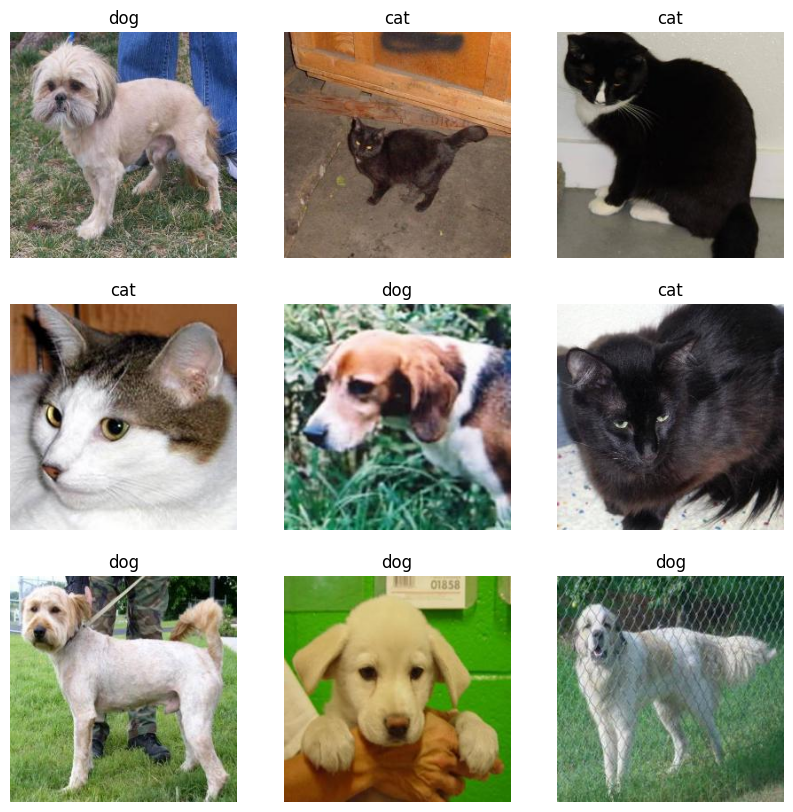

In [130]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    label = "dog" if train_y[i][0]<train_y[i][1] else 'cat' 
    ax.set_title(label)
    plt.imshow(train_x[i].astype("uint8"))
    plt.axis("off")

In [131]:
from tensorflow import keras
from keras import layers

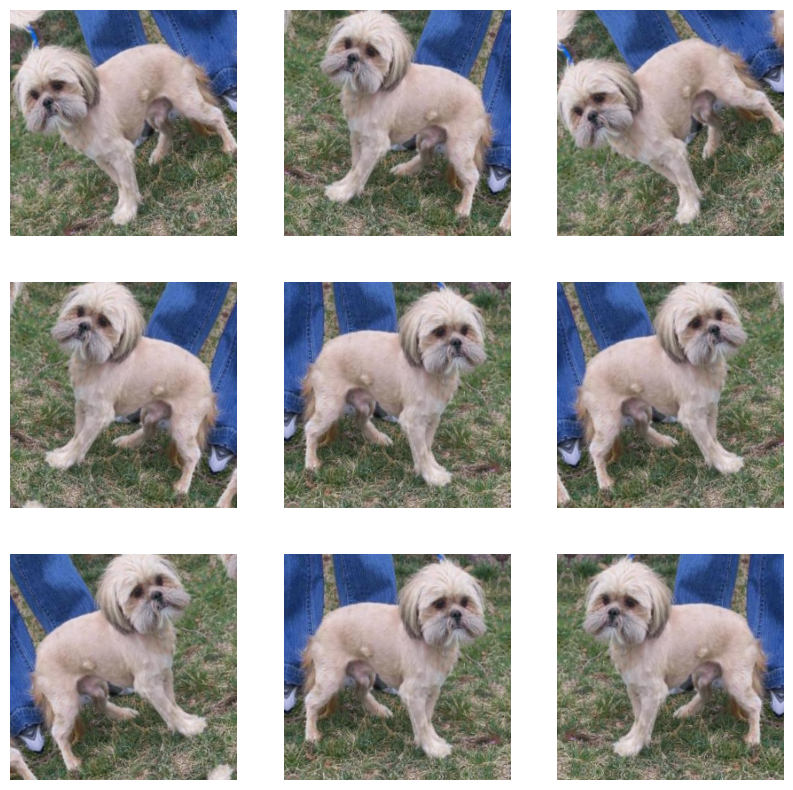

In [132]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)
plt.figure(figsize=(10, 10))
for images in train_x:
    for i in range(9):
        augmented_images = data_augmentation(images[None])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
    break


In [133]:
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Rescaling(1. / 255)(x)

In [140]:
model = keras.models.Sequential([keras.layers.InputLayer(input_shape=input_shape),
                                 layers.Rescaling(1./255),
                                 layers.RandomFlip("horizontal"),
                                layers.RandomRotation(0.1), 
                                 keras.layers.Conv2D(32, 8, strides=4,
                                                     activation="relu"),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128),
                                 keras.layers.Dense(2, activation="softmax")]
                                )

In [141]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_15 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 random_flip_19 (RandomFlip  (None, 256, 256, 3)       0         
 )                                                               
                                                                 
 random_rotation_19 (Random  (None, 256, 256, 3)       0         
 Rotation)                                                       
                                                                 
 conv2d_48 (Conv2D)          (None, 63, 63, 32)        6176      
                                                                 
 flatten_16 (Flatten)        (None, 127008)            0         
                                                                 
 dense_26 (Dense)            (None, 128)             

In [142]:
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="binary_crossentropy",
              metrics=["accuracy"]
              )

In [143]:
model.fit(train_x, train_y, batch_size=16, validation_data=[val_x,val_y], epochs=10)

Epoch 1/10
50/50 [==============================] - 5s 94ms/step - loss: 1.9370 - accuracy: 0.5175 - val_loss: 0.6526 - val_accuracy: 0.4650
Epoch 2/10
50/50 [==============================] - 4s 82ms/step - loss: 0.6483 - accuracy: 0.5875 - val_loss: 0.6906 - val_accuracy: 0.5400
Epoch 3/10
50/50 [==============================] - 4s 81ms/step - loss: 0.6927 - accuracy: 0.4913 - val_loss: 0.6887 - val_accuracy: 0.5500
Epoch 4/10
50/50 [==============================] - 4s 84ms/step - loss: 0.6748 - accuracy: 0.5263 - val_loss: 0.6722 - val_accuracy: 0.5250
Epoch 5/10
50/50 [==============================] - 4s 83ms/step - loss: 0.6699 - accuracy: 0.5700 - val_loss: 0.6632 - val_accuracy: 0.5300
Epoch 6/10
50/50 [==============================] - 4s 82ms/step - loss: 0.6647 - accuracy: 0.5713 - val_loss: 0.6438 - val_accuracy: 0.5350
Epoch 7/10
50/50 [==============================] - 4s 85ms/step - loss: 0.4397 - accuracy: 0.7775 - val_loss: 0.3237 - val_accuracy: 0.9600
Epoch 8/10
50

In [144]:
test_x, test_y = load_data("test")
model.evaluate(test_x,test_y)

7/7 [==============================] - 0s 11ms/step - loss: 0.6654 - accuracy: 0.6100


[0.6653899550437927, 0.6100000143051147]

In [138]:
def demonstrate(x,y):
    model.evaluate(x,y)
    hat = model.predict(x)
    hat = ["dog" if t[-1]<t[1] else 'cat' for t in hat]
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.set_title(hat[i])
        plt.imshow(test_x[i].astype("uint8"))
        plt.axis("off")

1/1 [==============================] - 0s 13ms/step


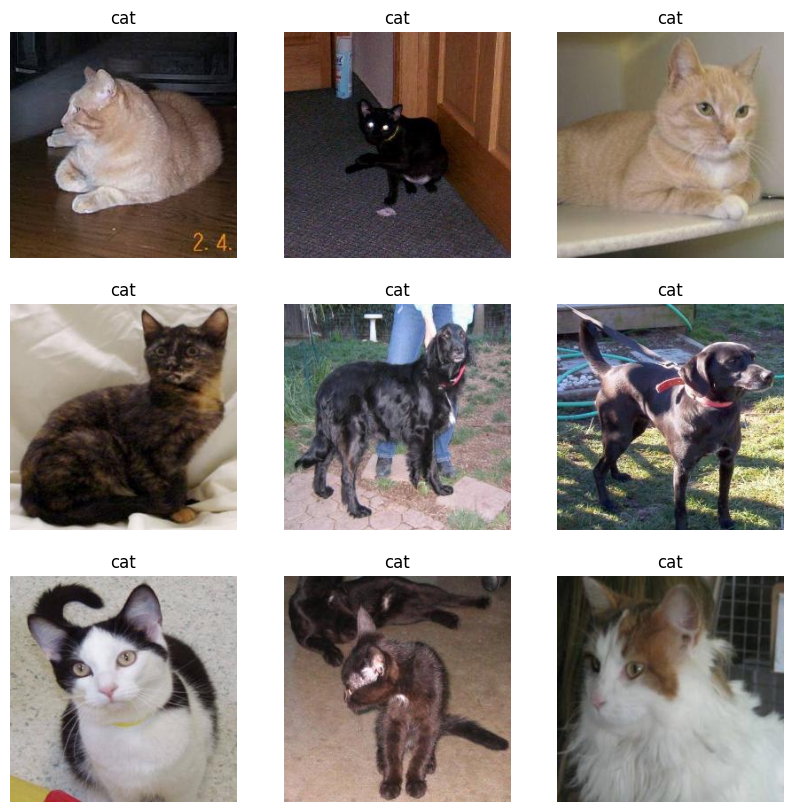

In [147]:
demonstrate(test_x[:10], test_y[:10])

## Some tricky samples

In [128]:
# tricky_x, tricky_y = load_data("tricky")
# model.evaluate(tricky_x,tricky_y)
# tricky_hat = model.predict(tricky_x)
# tricky_hat = ["dog" if t[-1]<t[1] else 'cat' for t in tricky_hat]
# plt.figure(figsize=(10, 10))
# for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     ax.set_title(tricky_hat[i])
#     plt.imshow(test_x[i].astype("uint8"))
#     plt.axis("off")